# 7 James-Stein Estimation and Ridge Regression

Recall that in the least-squares problem, $\hat\beta = (X^TX)^{-1}X^Ty$ is the best amongst all unbiased estimators. However, there exists biased estimators with even lower variance.

James-Stein estimator sacrifices some biasedness to trade for overall performance in variance. Oftentimes it has smaller variance than MLE.

## James-Stein Estimation 

### Posterior Mean 

First suppose $\mu\sim N(M,A)$ and $(x|\mu)\sim N(\mu,1)$ and $M,A,x\in\mathbb R$ are known and now $\mu$ is fixed but unknown. Then we can estimate $\mu$ by solving that 
$(\mu|x)\sim N(M+B(x-M), B)$ where $B = A(A+1)^{-1}<1$. We thus define the posterior mean of $\mu$, or Bayes estimator of $\mu$, by 
$$\hat\mu^{\rm Bayes} = M+B(x-M).$$

Then 
$$\mathbb E\left\{(\hat\mu^{\rm Bayes} - \mu)^2\right\} = B.$$

However, if given $x$ we use the MLE estimator to estimate $\mu$, which is $\hat\mu^{\rm MLE} = x$, then 
$$\mathbb E\left\{(\hat\mu^{\rm MLE})^2\right\} = 1>B.$$

Hence here the Bayes estimator is better in variance, as we have utilized the priori information $\mu\sim N(M,A)$.

### Unknown Posterior Parameters

Suppose $\mu\sim N(M,A)$ and $(x|\mu)\sim N(\mu,1)$ and only $x\in\mathbb R$ is known while $M,A$ are fixed but unknown. Still we have 
$(\mu|x,M,A)\sim N(M+B(x-M),B)$ where $B = A(A+1)^{-1}$. It suffices to estimate the parameters $M,A$.

When we have $n>3$ samples $x_1,\dotsc,x_n$, then we can use the following to provide unbiased estimators:
$$\hat M =\bar x\quad\quad \hat B =1 - \frac{n-3}{{\sum_{i=1}^n (x_i - \bar x)^2}}.$$


**Proof** It can be shown that $x\sim N(M,A+1)$ so $\mathbb E(\hat M) = \mathbb E(\bar x) = M$. For $\hat B$, we note that $\hat B =  1 - \frac{n-3}{(A+1)\chi_{n-1}^2}$ and
$$\mathbb E(\hat B ) = 1 - \frac{n-3}{A+1}\int_{0}^\infty \frac{1}{x}\frac{1}{2^{\frac{n-1}{2}}\Gamma(\frac{n-1}{2})}x^{\frac{n-1}{2}-1}e^{-\frac{x}{2}}dx= 1 - \frac{n-3}{A+1}\frac{2^{\frac{n-3}{2}}\Gamma(\frac{n-3}{2})}{2^{\frac{n-1}{2}}\Gamma(\frac{n-1}{2})}=\frac{A}{A+1}.
$$


## James-Stein Theorem

Suppose $(x_i|\mu_i)\sim N(\mu_i,1)$ independently for $i=1,2,\dotsc,n$ and $n>3$. Then 
$$\mathbb E\left\{\Vert \hat\mu^{\rm JS} - \mu\Vert^2\right\} < \mathbb E\left\{\Vert\hat\mu^{\rm MLE} - \mu\Vert^2\right\}$$
where $\mu = [\mu_1,\dotsc,\mu_n]^T$. Each $\mu_i$ can be a random variable.

## Ridge Regression

In linear regression ${\rm argmin}_{\hat\beta} \Vert y - X\hat\beta\Vert^2$, we can add a regularization term to form a new problem, called ridge regression term:

$${\rm argmin}_{\hat\beta}\left\{\Vert y - X\hat\beta\Vert^2 + \lambda\Vert\hat\beta\Vert^2\right\}$$

### Bayesian Rationale

We can explain the idea of ridge regression by Bayes. Assume the true parameter follows a Gaussian prior,
$$\beta\sim N (0,\Sigma).$$

Together with the assumption $\epsilon\sim N(0,\sigma^2I_n)$ and $y = X\beta+\epsilon$ we learn that 
$$\left[\begin{matrix}y\\ \beta\end{matrix}\right]
\sim N\left(0,\left[\begin{matrix} X\Sigma X^T+\sigma^2I_n & X\Sigma  \\ \Sigma  X^T & \Sigma\end{matrix}\right]\right).
$$

Then the conditional Gaussian distribution is given by 
$$(\beta|y)\sim N\big(\Sigma X^T(X\Sigma X^T+\sigma^2I_n)^{-1}y,\ \dotsc\big)$$

When $\Sigma = \frac{2}{\lambda}\sigma^2I_p$, we can estimate $\hat\beta$ with the conditional expectation,
$$\hat\beta = \Sigma X^T(X\Sigma X^T+\sigma^2I_n)^{-1}y=X^T(X X^T+\frac{\lambda}{2}I_n)^{-1}y.$$

Note that we have the equation
$$(X^TX+\frac{\lambda}{2}I_p)X^T = X^T(XX^T+\frac{\lambda}{2} I_n)\quad\Rightarrow\quad  X^T(XX^T+\frac{\lambda}{2} I_n)^{-1} = (X^TX+\frac{\lambda}{2}I_p)^{-1}X^T.$$

Thus, $\hat\beta = (X^TX+\frac{\lambda}{2}I_p)^{-1}X^Ty$ is exactly the minimizer of the ridge regression ${\rm argmin}\Vert y - X\beta\Vert^2+\frac \lambda 2\Vert \beta\Vert^2$.

In [7]:
import numpy as np
np.random.seed(0)
X = np.random.randn(8,4)
y = np.random.randn(X.shape[0])
b1 = X.T @ np.linalg.inv(X @ X.T + .5 * np.diag(np.ones(X.shape[0]))) @ y
b2 = np.linalg.inv(X.T @ X + .5 * np.diag(np.ones(X.shape[1]))) @ X.T @ y
b1 - b2

array([-8.32667268e-17, -1.11022302e-15, -2.08166817e-16, -1.11022302e-16])

## Shrinkage

On the other hand, when there is outlier, these estimations will badly impact the estimation of the outlier. One had better remove the outliers from the training data first.

## Estimating Distribution

The following part is an illustration of paper [[5](https://arxiv.org/abs/0811.3579)].

In [62]:
from scipy.stats import dirichlet, multinomial
import numpy as np
from matplotlib import pyplot as plt
m = 1000   # class number
runs = 1000  # total runs
alpha = np.ones(m) #* .0007
p = np.sort(dirichlet.rvs(alpha = alpha, size = runs), axis = 1)
h = -(p * np.log(p + 1e-14)).sum(axis = 1)

In [70]:
# pip install ndd (for NSB estimator)
from collections import defaultdict
from tqdm import  tqdm
ns = [10, 30, 100, 300, 1000, 3000, 10000]
mse, entropy_mse, entropy_bias, prob = defaultdict(list), defaultdict(list), defaultdict(list), {}
for n in tqdm(ns):
    y = np.stack([multinomial.rvs(n, p[i]) for i in range(runs)]) # observations
    prob['MLE'] = y / n
    prob['Bayes-Laplace'] = (y + 1) / (n + m)
    prob['Jeffreys'] = (y + .5) / (n + m / 2)
    prob['minimax'] = (y + n ** .5 / m) / (n + n ** .5)
    prob['Good-Turing'] = (1 - np.sum(y == 1, axis = 1) / n) * prob['MLE']

    weight = (1 - (prob['MLE'] ** 2).sum(axis = 1)) / ((prob['MLE'] - 1 / m) ** 2).sum(axis = 1) / (n - 1)
    prob['James-Stein'] = (1 / m - prob['MLE']) * np.expand_dims(weight, axis = -1) + prob['MLE']
    [mse[key].append(((p - value) ** 2).sum() / runs) for key, value in prob.items()]

    entropy = dict((key, -(value * np.log(np.clip(value, 1e-14, None))).sum(axis = 1)) for key, value in prob.items())
    entropy['Miller-Madow'] = entropy['MLE'] + (np.sum(y != 0, axis = 1) - 1) / (2 * n)

    # Good-Turing does not support usual entropy estimation, instead we use Chao-Shen
    entropy['Chao-Shen'] = -((prob['Good-Turing'] * np.log(np.clip(prob['Good-Turing'], 1e-14, None))) / \
        (1 - (1 - prob['Good-Turing']) ** n + 1e-14)).sum(axis = 1)
    del entropy['Good-Turing']

    [entropy_mse[key].append(((h - value) ** 2).mean()) for key, value in entropy.items()]
    [entropy_bias[key].append(((value - h)).mean()) for key, value in entropy.items()]

100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


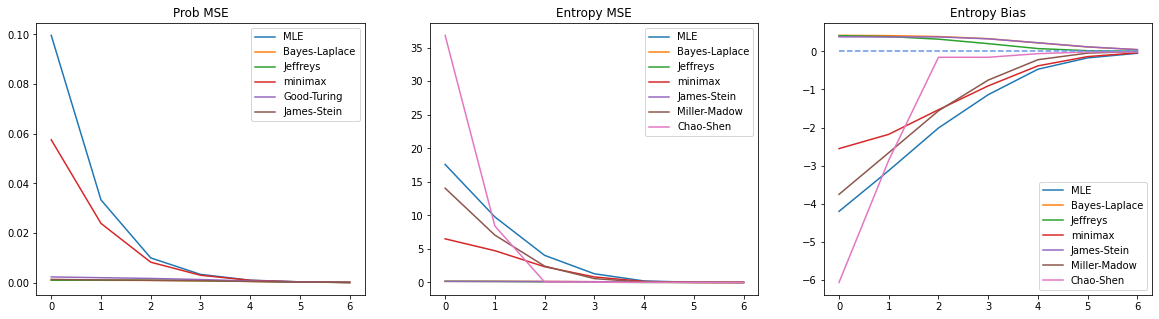

In [71]:
plt.figure(figsize = (20, 5))
for i, content, title in zip((1,2,3), (mse, entropy_mse, entropy_bias), ('Prob MSE', 'Entropy MSE', 'Entropy Bias')):
    plt.subplot(1, 3, i)
    plt.plot(np.array(list(content.values())).T)
    plt.legend(content.keys())
    plt.title(title)
    if i == 3:
        plt.plot(np.linspace(0, len(ns) - 1, num = 1000), [0] * 1000, '--', c = 'CornflowerBlue')
plt.show()

## References

[1] https://grbio.upc.edu/en/shared/material-seminaris/20210223_TALKFReverter.pdf

[2] https://andrewcharlesjones.github.io/journal/james-stein-estimator.html

[3] W. James, Charles Stein. [Estimation of Quadratic Loss](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings-of-the-Fourth-Berkeley-Symposium-on-Mathematical-Statistics-and/chapter/Estimation-with-Quadratic-Loss/bsmsp/1200512173.pdf), 1992.

[4] Charles Stein. [Inadmissibility of the Usual Estimator for the Mean of a Multivariate Normal Distribution](https://projecteuclid.org/ebook/Download?urlid=bsmsp%2F1200501656&isFullBook=False), 1956.

[5] Hausser, Jean, Strimmer, Korbinian. [Entropy Inference and the James-Stein Estimator, With Application to Nonlinear Gene Association Networks](https://arxiv.org/abs/0811.3579), 2008.